In [ ]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import scienceplots as sp
import seaborn as sns
from cycler import cycler

column_width = 3.5

with plt.style.context(['science']):
    sci_cycle = plt.rcParams['axes.prop_cycle']

In [24]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
SHOW = False
# SHOW = True

# Block Hoyer vs Hoyer Sparsity and Accuracy Results

In [25]:
data_sparsity = {
    'Dataset': ['CIFAR10', 'CIFAR100', 'Tiny ImageNet'], 
    'Baseline': [56.01, 57.70, 52.6],
    'Hoyer': [89.65, 89.54, 92.99],
    'Block Hoyer': [93.52, 95.74, 94.68],
}
df_sparsity = pd.DataFrame(data_sparsity)

data_accuracy = {
    'Dataset': ['CIFAR10', 'CIFAR100', 'Tiny ImageNet'], 
    'Baseline': [84.74, 56.80, 41.25],
    'Hoyer': [83.85, 57.48, 40.78],
    'Block Hoyer': [83.79, 57.60, 40.74],
    # '2:4 Enforced Hoyer': [],
    # '2:4 Enforced Block Hoyer': [],
}
df_accuracy = pd.DataFrame(data_accuracy)

In [26]:
df_accuracy

,Dataset,Baseline,Hoyer,Block Hoyer
0,CIFAR10,84.74,83.85,83.79
1,CIFAR100,56.80,57.48,57.60
2,Tiny ImageNet,41.25,40.78,40.74


In [27]:
df_accuracy = pd.melt(df_accuracy, id_vars=['Dataset'], value_vars=['Baseline', 'Hoyer', 'Block Hoyer'])
df_accuracy

,Dataset,variable,value
0,CIFAR10,Baseline,84.74
1,CIFAR100,Baseline,56.80
2,Tiny ImageNet,Baseline,41.25
3,CIFAR10,Hoyer,83.85
4,CIFAR100,Hoyer,57.48
5,Tiny ImageNet,Hoyer,40.78
6,CIFAR10,Block Hoyer,83.79
7,CIFAR100,Block Hoyer,57.60
8,Tiny ImageNet,Block Hoyer,40.74


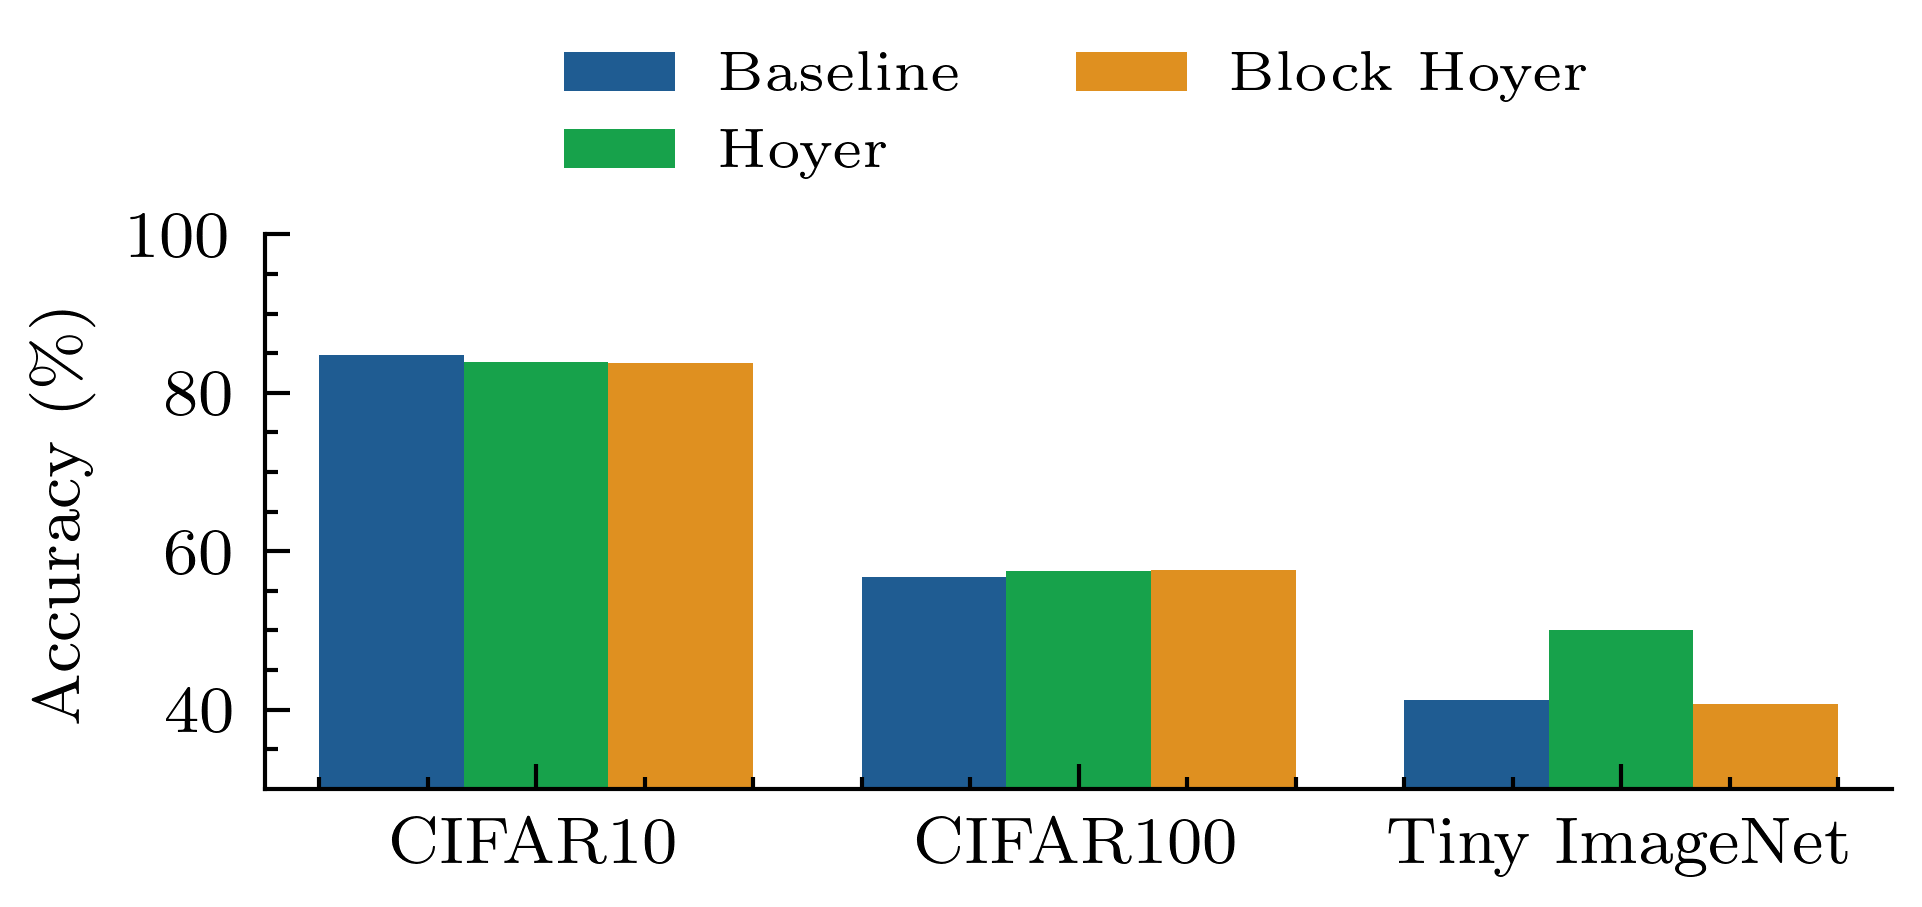

In [6]:
y_axis_label = 'Accuracy (\%)'

with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    plt.figure(figsize=(column_width, 1.2))
    ax = sns.barplot(data=df_accuracy, x='Dataset', y='value', hue='variable')
    # ax.set_yscale('log')
    ax.legend(title='', loc='lower center', bbox_to_anchor=(0.5, 1.06), ncol=2, fancybox=True, shadow=True, borderaxespad=0, fontsize='small')

    # Set custom axis labels
    ax.set_xlabel('')
    ax.set_ylabel(y_axis_label)
    ax.set_ylim(30,100)

    # Despine the plot (remove right and top spines)
    sns.despine()

    # Remove tick labels from the top and right sides of the figure
    plt.tick_params(axis='both', which='both', top=False, right=False)
    
    # Rotatce xticks
    # plt.xticks(rotation=40)
    
    # Manually add horizontal grid lines behind the bars
    # y_ticks = ax.get_yticks()
    # for y in y_ticks:
        # ax.axhline(y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/swapping_barplot.pgf', bbox_inches='tight')
        plt.close()

In [28]:
df_sparsity

,Dataset,Baseline,Hoyer,Block Hoyer
0,CIFAR10,56.01,89.65,93.52
1,CIFAR100,57.70,89.54,95.74
2,Tiny ImageNet,52.60,92.99,94.68


In [29]:
df_sparsity = pd.melt(df_sparsity, id_vars=['Dataset'], value_vars=['Baseline', 'Hoyer', 'Block Hoyer'])
df_sparsity

,Dataset,variable,value
0,CIFAR10,Baseline,56.01
1,CIFAR100,Baseline,57.70
2,Tiny ImageNet,Baseline,52.60
3,CIFAR10,Hoyer,89.65
4,CIFAR100,Hoyer,89.54
5,Tiny ImageNet,Hoyer,92.99
6,CIFAR10,Block Hoyer,93.52
7,CIFAR100,Block Hoyer,95.74
8,Tiny ImageNet,Block Hoyer,94.68


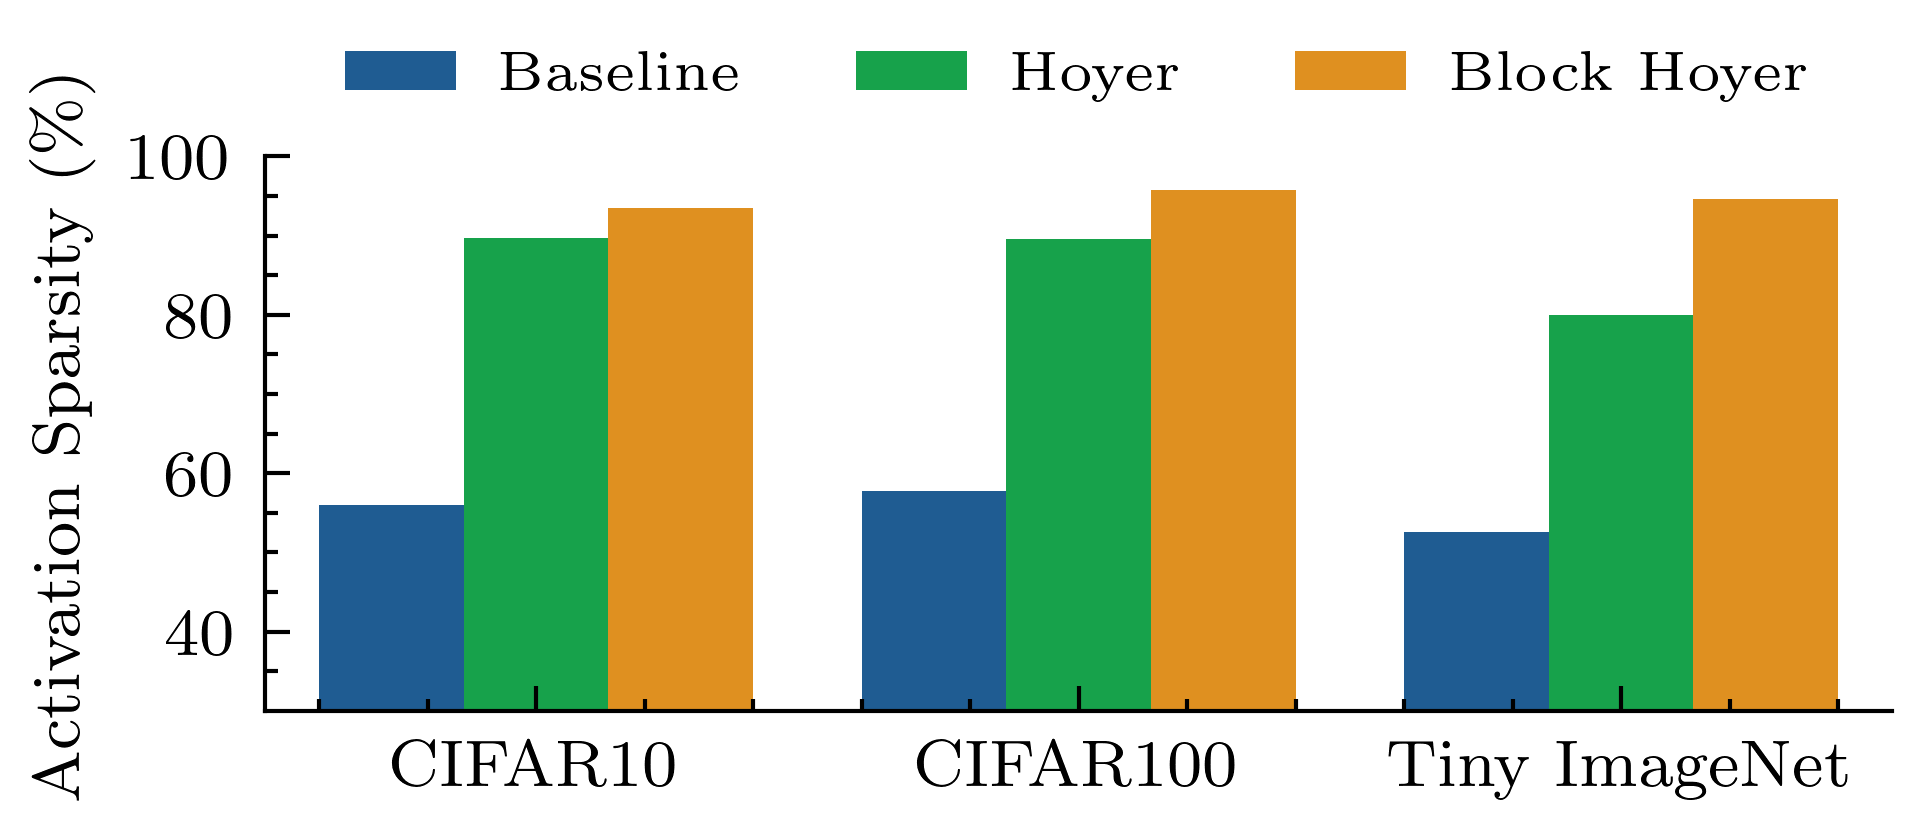

In [9]:
y_axis_label = 'Activation Sparsity (\%)'

with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    plt.figure(figsize=(column_width, 1.2))
    ax = sns.barplot(data=df_sparsity, x='Dataset', y='value', hue='variable')
    # ax.set_yscale('log')
    ax.legend(title='', loc='lower center', bbox_to_anchor=(0.5, 1.06), ncol=3, fancybox=True, shadow=True, borderaxespad=0, fontsize='small')

    # Set custom axis labels
    ax.set_xlabel('')
    ax.set_ylabel(y_axis_label)
    ax.set_ylim(30,100)

    # Despine the plot (remove right and top spines)
    sns.despine()

    # Remove tick labels from the top and right sides of the figure
    plt.tick_params(axis='both', which='both', top=False, right=False)
    
    # Rotatce xticks
    # plt.xticks(rotation=40)
    
    # Manually add horizontal grid lines behind the bars
    # y_ticks = ax.get_yticks()
    # for y in y_ticks:
        # ax.axhline(y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/swapping_barplot.pgf', bbox_inches='tight')
        plt.close()

In [30]:
uci_colors = ['#255799', '#fecc07', '#002244', '#f0ab00', '#00b0ca', '#f78d2d']
with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = cycler(color=uci_colors)
    # Create a figure and axis
    fig, (ax1_, ax2_) = plt.subplots(figsize=(column_width, column_width /1.5), nrows=2)
    
    ax1 = sns.barplot(data=df_sparsity, x='Dataset', y='value', hue='variable', ax=ax1_, saturation=1)
    ax1.legend(title='', loc='lower center', bbox_to_anchor=(0.5, 1.06), ncol=3, fancybox=True, shadow=True, borderaxespad=0, fontsize='small')

    ax1.set_xlabel('')
    ax1.set_ylabel('Sparsity (\%)')
    ax1.set_ylim(50,100)
    
    # plt.tick_params(axis='both', which='both', top=False, right=False)
    
    ax2 = sns.barplot(data=df_accuracy, x='Dataset', y='value', hue='variable', ax=ax2_, saturation=1)
    ax2.get_legend().remove()

    ax2.set_xlabel('')
    ax2.set_ylabel('Accuracy (\%)')
    ax2.set_ylim(30,100)
    
    # plt.tick_params(axis='both', which='both', top=False, right=False)
    
    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/reg_barplot.pgf', bbox_inches='tight')
        plt.close()
    

# ResNet Induced Sparsity Results

In [3]:
natural_sparsity = 43.76
initial_accuracy = 68.15

In [4]:
experiments = torch.tensor([1, 2, 3, 4, 5])
induced_sparsity = torch.tensor([44.56, 48.18, 49.49, 50.25, 54.64])
final_accuracy = torch.tensor([68.01, 67.98, 67.94, 67.93, 67.58])

In [5]:
diff_sparisty = induced_sparsity - natural_sparsity
diff_accuracy = initial_accuracy - final_accuracy

In [6]:
diff_sparisty

tensor([ 0.8000,  4.4200,  5.7300,  6.4900, 10.8800])

In [7]:
diff_accuracy

tensor([0.1400, 0.1700, 0.2100, 0.2200, 0.5700])

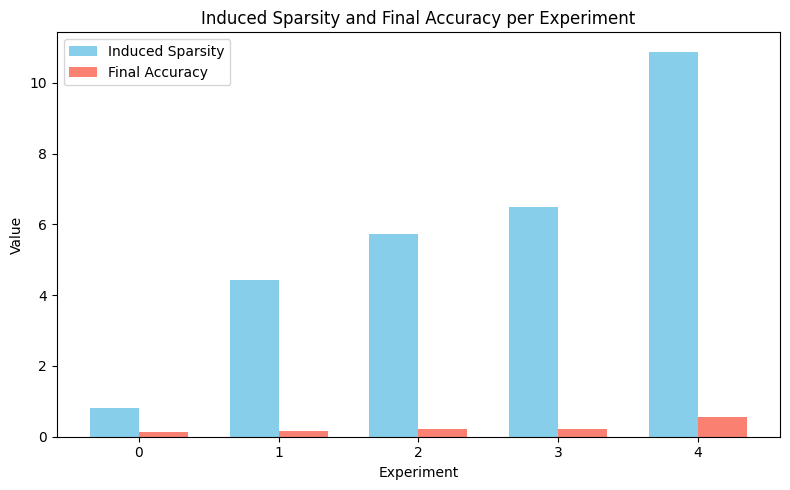

In [9]:
# Set bar width and x positions
bar_width = 0.35
x = np.arange(len(experiments))

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot both bars with offset
bars1 = ax.bar(x - bar_width/2, diff_sparisty, width=bar_width, label='Induced Sparsity', color='skyblue')
bars2 = ax.bar(x + bar_width/2, diff_accuracy, width=bar_width, label='Final Accuracy', color='salmon')

# Add labels and legend
ax.set_xlabel('Experiment')
ax.set_ylabel('Value')
ax.set_title('Induced Sparsity and Final Accuracy per Experiment')
ax.set_xticks(x)
# ax.set_xticklabels(experiments)
ax.legend()

plt.tight_layout()
plt.show()